### Курсовой проект "Предсказание цен на недвижимость на основе различных факторов"

#### Выполнил: Жеребчиков Никита Алексеевич

#### Группа: ИД22-4

###  Часть 1. Визуализация набора данных.

Скачиваем и импортируем нужные модули.

In [44]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Задан путь к обучающей выборке. Так же получены размеры.

In [45]:
train_file_path = "train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


Что из себя представляет датасет в общем виде.

In [46]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Удален столбец с id. Во время обучения водели он будет мешать.

In [47]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Далее ознакомимся с типами данных для колонок. Так же можно увидеть сколько колонок с определенным типам данных.

In [48]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

На графике распределение цен на недвижимость. по оси Y - число комнат, по X - цена.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-49-e59e3216e9fe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


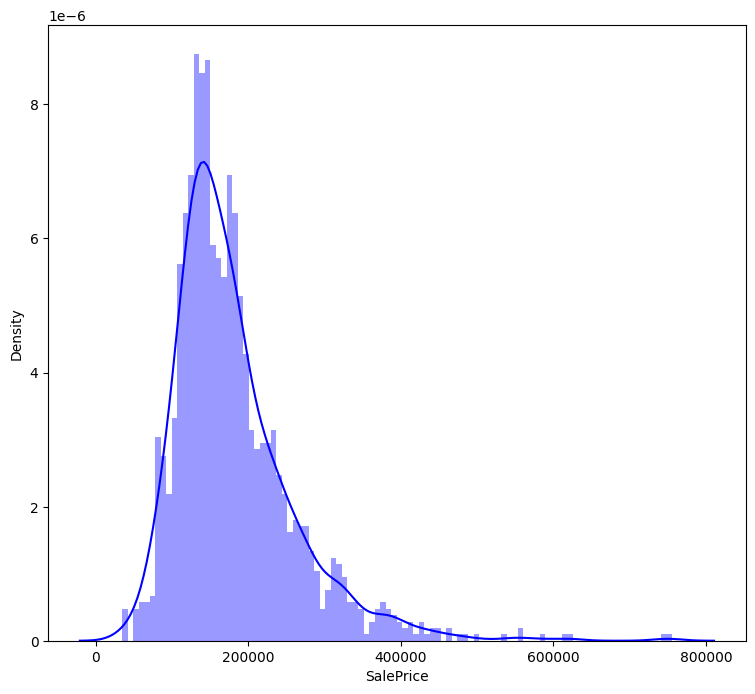

In [49]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [50]:
list(set(dataset_df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

Из датасета выделены данные с численными типами float64' и 'int64' чтобы визуализировать распределение числовых колонок.

In [51]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Графики распределения всех числовых характеристик.

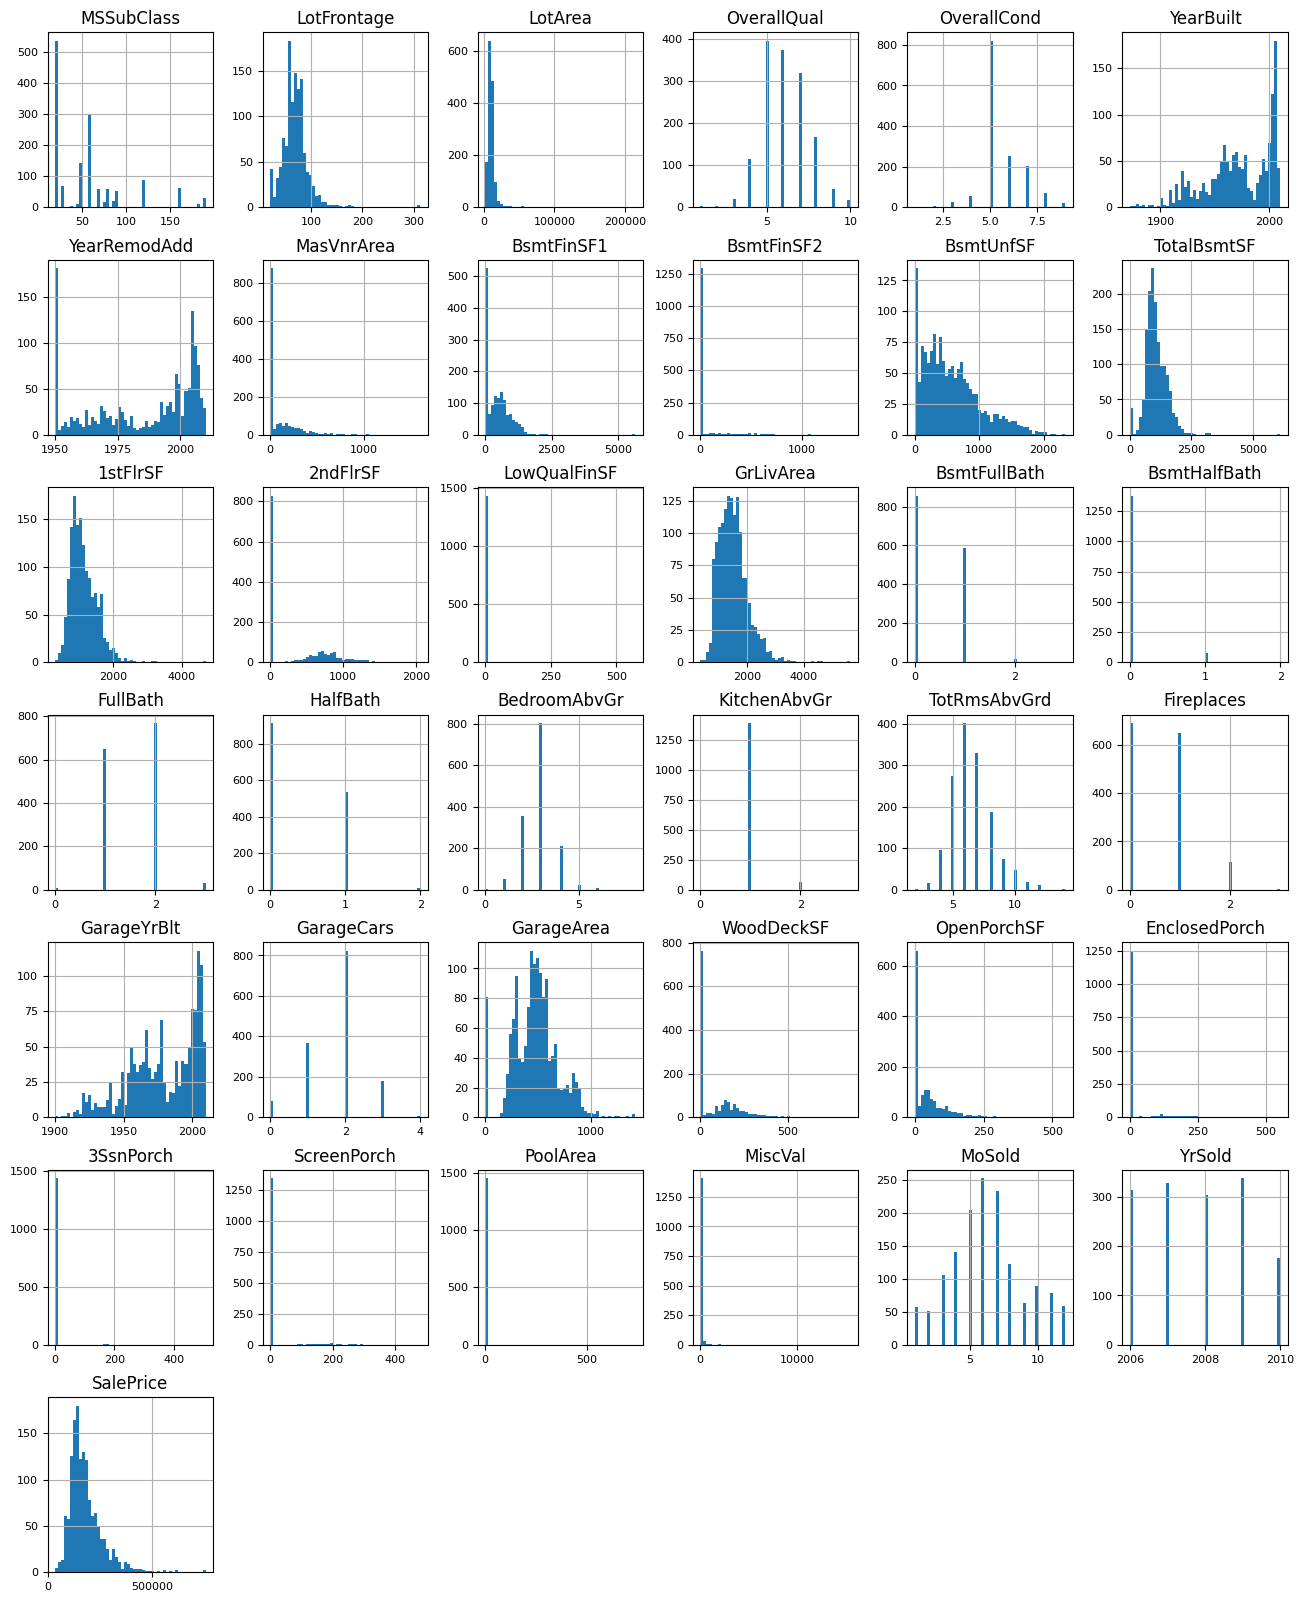

In [52]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

###  Часть 2. Разделение данных.

split_dataset разделяет датасет на тестовую и обучающую выборку. Тестовая выборка 30% от обучающей.

In [53]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1019 examples in training, 441 examples in testing.


Для использования TF нжно преобразовать dataframe в tf формат:

In [54]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

###  Часть 3. Обучение модели на стандартных гиперпараметрах.

Создание модели и компиляция с метрикой оценки mse.

In [55]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmpepwxr6_x as temporary training directory


Обучение модели на тренировочном датасете.

In [56]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.997707. Found 1019 examples.
Training model...
Model trained in 0:00:02.942404
Compiling model...


Model compiled.


### Часть 4. Анализ промежуточных результатов.

На графике проилюстрированны начальные ветвления дерева модели. Они илюстрируют логику работы прогнозирования.

In [57]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

На графике видно как с обучением(увеличением количества ветвлений) уменьшается ошибка

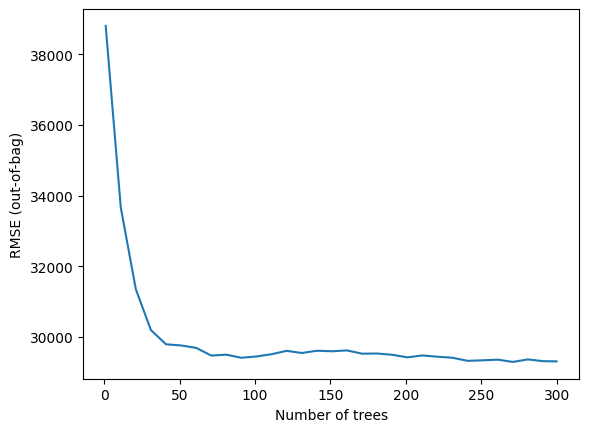

In [58]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

inspector.evaluation() - используется для просмотра базовых метрик производительности модели.
- Модель обучалась на 998 наблюденях.
- accuracy=None так как это метрика для моделей классификации.
- loss=None возвращает функцию потерь, но ее не существует для моделей регрессии.
- rmse=30971.82336264932 Означает, что средняя ошибка для train_ds около 30.000$

In [59]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1019, accuracy=None, loss=None, rmse=29308.411233703406, ndcg=None, aucs=None, auuc=None, qini=None)

На тестовой выборке средняя ошибка составила 26.082$

In [60]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 448ms/step - loss: 0.0000e+00 - mse: 715702336.0000
loss: 0.0000
mse: 715702336.0000


Ниже предствавленны ключевые важные признаки:

In [61]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


Ниже представлены все важности признаков:


In [62]:
inspector.variable_importances()["SUM_SCORE"][:12]

[("OverallQual" (1; #62), 472532969354424.5),
 ("Neighborhood" (4; #59), 263836963900560.44),
 ("GrLivArea" (1; #38), 204161094169967.47),
 ("ExterQual" (4; #22), 159022263993855.72),
 ("GarageCars" (1; #32), 126227265626121.5),
 ("TotalBsmtSF" (1; #73), 73062601477830.56),
 ("YearBuilt" (1; #76), 63144589183910.66),
 ("1stFlrSF" (1; #0), 50937206912668.75),
 ("BsmtQual" (4; #14), 41971329538336.75),
 ("KitchenQual" (4; #44), 41354788785031.56),
 ("BsmtFinSF1" (1; #8), 33807577493350.125),
 ("GarageArea" (1; #31), 33451562793287.33)]

In [63]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 105.0),
 ("ExterQual" (4; #22), 54.0),
 ("Neighborhood" (4; #59), 47.0),
 ("GarageCars" (1; #32), 32.0),
 ("YearBuilt" (1; #76), 18.0),
 ("KitchenQual" (4; #44), 13.0),
 ("TotalBsmtSF" (1; #73), 10.0),
 ("GrLivArea" (1; #38), 8.0),
 ("BsmtQual" (4; #14), 7.0),
 ("GarageArea" (1; #31), 3.0),
 ("GarageYrBlt" (1; #37), 2.0),
 ("FullBath" (1; #29), 1.0)]

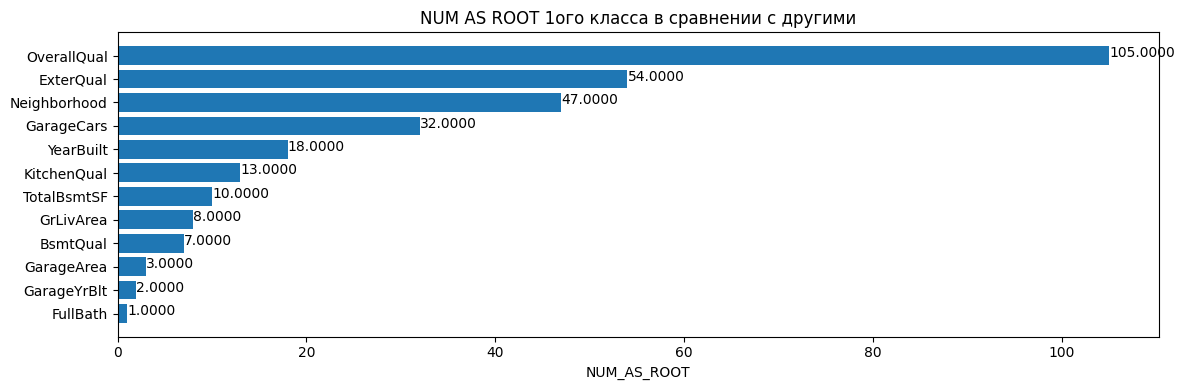

In [64]:
plt.figure(figsize=(12, 4))

# Среднее значение класса 1 по сравнению с другими.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]


# `variable_importances` - список <feature, importance> кортежей.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# Характеристики упоряядочены по убыванию важности.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# Присвоение каждому столюцу по значению.
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT 1ого класса в сравнении с другими")
plt.tight_layout()
plt.show()

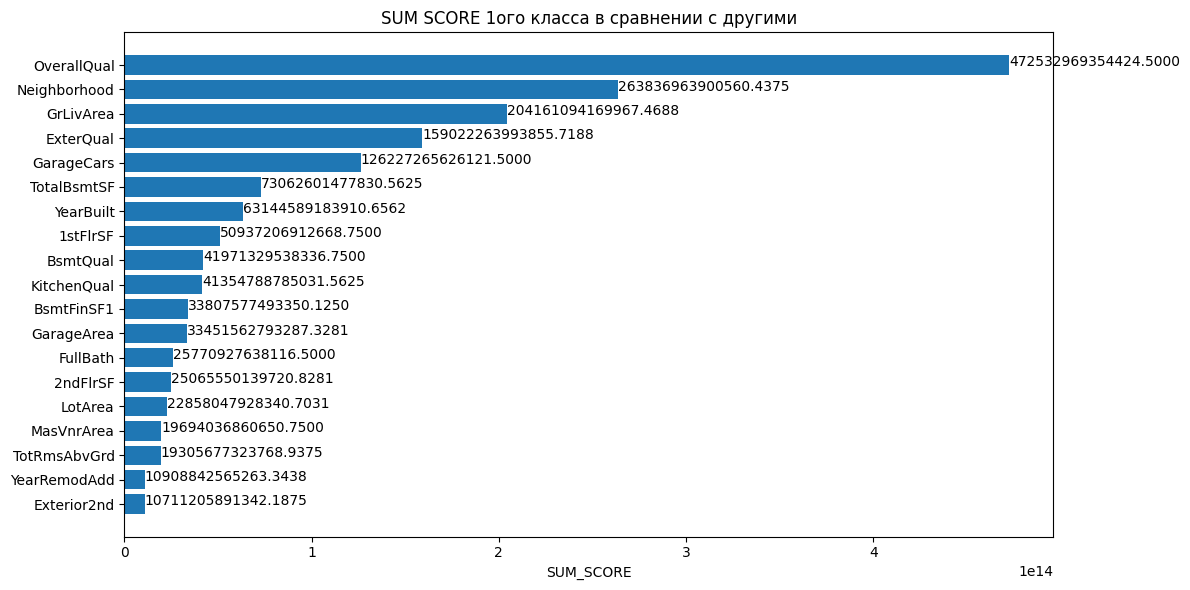

In [65]:
plt.figure(figsize=(12, 6))
# Среднее значение класса 1 по сравнению с другими.
variable_importance_metric = "SUM_SCORE"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# `variable_importances` - список <feature, importance> кортежей.
importance_threshold = 10187500126690.7500  # Фильтр для устранения незначительных значений.
filtered_importances = [(vi[0].name, vi[1]) for vi in variable_importances if vi[1] > importance_threshold]

# Separate the names and values after filtering
feature_names = [vi[0] for vi in filtered_importances]
feature_importances = [vi[1] for vi in filtered_importances]

# Характеристики упоряядочены по убыванию важности.
feature_ranks = range(len(feature_names))

# Создание горзонтальных баров на графике.
bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# Обозначить для каждого бара значение.
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("SUM SCORE 1ого класса в сравнении с другими")
plt.tight_layout()
plt.show()

### Часть 5. Настройка гиперпараметров.

In [136]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION,
                                  num_trees = 500,
                                  max_depth=10)
rf.compile(metrics=["mse"])

Use /tmp/tmp_un1w2tz as temporary training directory


In [137]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.950963. Found 1019 examples.
Training model...
Model trained in 0:00:03.404435
Compiling model...
Model compiled.


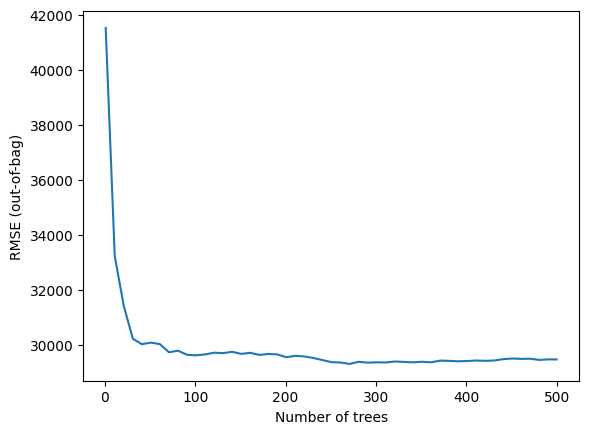

In [138]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [139]:
import math

inspector = rf.make_inspector()
print(f"{inspector.evaluation()}\n")

evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

Evaluation(num_examples=1019, accuracy=None, loss=None, rmse=29460.743985517776, ndcg=None, aucs=None, auuc=None, qini=None)

1/1 [==============================] - 0s 407ms/step - loss: 0.0000e+00 - mse: 736813952.0000
loss: 0.0000
mse: 736813952.0000
